In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('LOLOracleData.csv')

In [3]:
df.head()

,server,summoner_name,winner,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Time
0,na,AnDa,Red,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,2020-12-23 14:12:18 26m 18s
1,na,AnDa,Blue,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,2020-12-23 13:19:48 20m 42s
2,na,AnDa,Blue,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,2020-12-22 15:11:07 15m 20s
3,na,AnDa,Red,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,2020-12-22 14:46:00 30m 34s
4,na,AnDa,Red,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,2020-12-22 13:59:22 29m 58s


In [4]:
df.drop(['server','summoner_name','Time'],axis=1,inplace=True)

In [5]:
df['Winner'] = df['winner']

In [6]:
df.drop('winner',axis=1,inplace=True)

In [7]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner
0,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,Red
1,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,Blue
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,Blue
3,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,Red
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,Red


In [8]:
color = ['Blue','Red']
num = [0,1]
d = dict(zip(color,num))

In [9]:
d

{'Blue': 0, 'Red': 1}

In [10]:
df['Winner'].replace(d,inplace=True)

In [11]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner
0,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,1
1,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,0
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,0
3,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,1
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,1


In [12]:
#To collect all the unique champion names

col = ['BTop', 'BJng', 'BMid', 'BAdc', 'BSup', 'RTop', 'RJng',
       'RMid', 'RAdc', 'RSup']
champ= []
for i in col:
    tempchamp = df[i].unique()
    champ = np.append(champ,tempchamp)
    
    
#Converting the data to a series to extract unique values and converting it back to a list    
temp = pd.Series(champ)
champions = temp.unique()
champions = list(champions)

In [13]:
len(champions)

153

In [14]:
synergy = pd.DataFrame(champions)

In [15]:
synergy.columns = ['Champions']

In [16]:
zeros = np.zeros(153).reshape(153,1)

In [17]:
for i in range(len(champions)):
    synergy[champions[i]] = zeros

In [18]:
synergy.tail()

,Champions,Camille,Irelia,Graves,Vladimir,Volibear,Renekton,Riven,Aatrox,Wukong,...,Jinx,Elise,Yuumi,Blitzcrank,Braum,Alistar,Zyra,Xayah,Nami,Rell
148,Alistar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,Zyra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,Xayah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,Nami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,Rell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
synergy[champions] = synergy[champions].astype(int)

In [20]:
synergy.set_index('Champions',inplace=True)

In [21]:
dfblue = df.copy()

In [22]:
dfblue.drop(['RTop','RJng','RMid','RAdc','RSup'],axis=1,inplace=True)

In [23]:
dfblue

,BTop,BJng,BMid,BAdc,BSup,Winner
0,Camille,Gragas,Yone,Jhin,Brand,1
1,Camille,Nidalee,Galio,Jhin,Anivia,0
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,0
3,Graves,Kindred,Sylas,Vayne,Bard,1
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,1
...,...,...,...,...,...,...
19674,Jayce,Graves,Viktor,Swain,Alistar,1
19675,Lucian,Lillia,Ekko,Vayne,Maokai,1
19676,Tristana,Graves,Wukong,Ziggs,Leona,0
19677,Vladimir,Udyr,Twisted Fate,Samira,Alistar,0


In [24]:
for i in range(len(dfblue)):
    if dfblue.loc[i,'Winner']==0:
        linedata = list(dfblue.iloc[i,:-1].values)
        for j in range(len(linedata)):
            linedata2 = linedata.copy()
            linedata2.remove(linedata[j])
            for k in range(len(linedata2)):
                synergy.loc[linedata[j],linedata2[k]]+=1
                
    else:
        linedata = list(dfblue.iloc[i,:-1].values)
        for j in range(len(linedata)):
            linedata2 = linedata.copy()
            linedata2.remove(linedata[j])
            for k in range(len(linedata2)):
                synergy.loc[linedata[j],linedata2[k]]-=1
            
              

In [25]:
synergy

,Camille,Irelia,Graves,Vladimir,Volibear,Renekton,Riven,Aatrox,Wukong,Sett,...,Jinx,Elise,Yuumi,Blitzcrank,Braum,Alistar,Zyra,Xayah,Nami,Rell
Champions,,,,,,,,,,,,,,,,,,,,,
Camille,0,0,7,9,-2,2,1,-2,-2,16,...,-3,13,-6,0,-8,22,5,6,-3,4
Irelia,0,0,2,-4,0,7,-2,7,-4,-5,...,2,-5,-3,-2,2,2,4,-1,5,-2
Graves,7,2,0,13,-6,1,13,19,1,14,...,-8,1,2,6,-4,19,1,-9,-1,-4
Vladimir,9,-4,13,0,-1,-4,5,-3,1,-1,...,0,2,-6,4,-4,-1,1,-1,4,0
Volibear,-2,0,-6,-1,0,-2,0,-4,-1,2,...,2,1,-2,-3,-3,-2,1,0,-3,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alistar,22,2,19,-1,-2,0,8,16,-2,-8,...,-1,-3,0,0,0,0,0,-7,0,0
Zyra,5,4,1,1,1,-1,4,-3,4,-1,...,1,0,0,-1,0,0,0,0,0,0
Xayah,6,-1,-9,-1,0,-6,-5,-2,2,0,...,0,-1,-1,1,-2,-7,0,0,2,1


In [26]:
dfred = df.copy()

In [27]:
dfred.drop(['BTop','BJng','BMid','BAdc','BSup'],axis=1,inplace=True)

In [28]:
dfred

,RTop,RJng,RMid,RAdc,RSup,Winner
0,Shen,Graves,Sylas,Kai'Sa,Karma,1
1,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,0
2,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,0
3,Renekton,Nidalee,Ekko,Sivir,Pyke,1
4,Jhin,Nidalee,Yone,Orianna,Pantheon,1
...,...,...,...,...,...,...
19674,Camille,Kayn,Galio,Ezreal,Seraphine,1
19675,Brand,Volibear,Azir,Samira,Alistar,1
19676,Jayce,Lillia,Lucian,Ezreal,Braum,0
19677,Ornn,Graves,Viktor,Lucian,Thresh,0


In [29]:
for i in range(len(dfred)):
    if dfred.loc[i,'Winner']==1:
        linedata = list(dfred.iloc[i,:-1].values)
        for j in range(len(linedata)):
            linedata2 = linedata.copy()
            linedata2.remove(linedata[j])
            for k in range(len(linedata2)):
                synergy.loc[linedata[j],linedata2[k]]+=1
                
    else:
        linedata = list(dfred.iloc[i,:-1].values)
        for j in range(len(linedata)):
            linedata2 = linedata.copy()
            linedata2.remove(linedata[j])
            for k in range(len(linedata2)):
                synergy.loc[linedata[j],linedata2[k]]-=1
            
              

In [30]:
synergy

,Camille,Irelia,Graves,Vladimir,Volibear,Renekton,Riven,Aatrox,Wukong,Sett,...,Jinx,Elise,Yuumi,Blitzcrank,Braum,Alistar,Zyra,Xayah,Nami,Rell
Champions,,,,,,,,,,,,,,,,,,,,,
Camille,0,4,25,-8,-5,6,3,-4,-2,-3,...,0,13,-2,-8,-2,26,5,-1,-5,1
Irelia,4,0,-33,-9,0,12,0,16,-2,-12,...,4,-6,-7,-7,0,5,5,-2,5,1
Graves,25,-33,0,15,-11,2,18,10,-1,-12,...,-2,0,6,4,-10,33,-1,-8,-2,-3
Vladimir,-8,-9,15,0,-1,-6,7,-4,2,2,...,-1,-2,-11,3,-9,-10,0,-1,9,0
Volibear,-5,0,-11,-1,0,-4,1,-1,-1,0,...,3,0,-3,-6,-6,9,1,-2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alistar,26,5,33,-10,9,26,6,16,-1,-14,...,-1,0,0,0,0,0,0,-8,0,0
Zyra,5,5,-1,0,1,-1,4,-5,2,1,...,0,0,0,-1,0,0,0,0,-1,0
Xayah,-1,-2,-8,-1,-2,-4,-5,1,-2,-11,...,0,-3,-4,-2,0,-8,0,0,3,2


In [31]:
df['BSyn'] = 0
df['RSyn'] = 0

In [32]:
df

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner,BSyn,RSyn
0,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,1,0,0
1,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,0,0,0
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,0,0,0
3,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,1,0,0
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19674,Jayce,Graves,Viktor,Swain,Alistar,Camille,Kayn,Galio,Ezreal,Seraphine,1,0,0
19675,Lucian,Lillia,Ekko,Vayne,Maokai,Brand,Volibear,Azir,Samira,Alistar,1,0,0
19676,Tristana,Graves,Wukong,Ziggs,Leona,Jayce,Lillia,Lucian,Ezreal,Braum,0,0,0
19677,Vladimir,Udyr,Twisted Fate,Samira,Alistar,Ornn,Graves,Viktor,Lucian,Thresh,0,0,0


In [33]:
blue = ['BTop','BJng','BMid','BAdc','BSup']
red = ['RTop','RJng','RMid','RAdc','RSup']

In [34]:
df[blue]

,BTop,BJng,BMid,BAdc,BSup
0,Camille,Gragas,Yone,Jhin,Brand
1,Camille,Nidalee,Galio,Jhin,Anivia
2,Irelia,Ekko,Annie,Kai'Sa,Thresh
3,Graves,Kindred,Sylas,Vayne,Bard
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona
...,...,...,...,...,...
19674,Jayce,Graves,Viktor,Swain,Alistar
19675,Lucian,Lillia,Ekko,Vayne,Maokai
19676,Tristana,Graves,Wukong,Ziggs,Leona
19677,Vladimir,Udyr,Twisted Fate,Samira,Alistar


In [35]:
count=0
i=0
if i==0:
    score = 0
    bluechamps = list(df.loc[i,blue].values)
    for j in range(len(bluechamps)):
            restchamps = bluechamps.copy()
            restchamps.remove(bluechamps[j])
            for k in range(len(restchamps)):
                print((int(synergy.loc[bluechamps[j],[restchamps[k]]].values)))
                count+=1
    print(f'\n\ncount is: {count}')


4
2
61
-5
4
20
14
-5
2
20
-3
-26
61
14
-3
6
-5
-5
-26
6


count is: 20


In [36]:
#Blue side synergy score

for i in range(len(df)):
    score = 0
    bluechamps = list(df.loc[i,blue].values)
    for j in range(len(bluechamps)):
            restchamps = bluechamps.copy()
            restchamps.remove(bluechamps[j])
            for k in range(len(restchamps)):
                score+=(int(synergy.loc[bluechamps[j],[restchamps[k]]].values))
    
    df.loc[i,'BSyn']=score

In [37]:
#Red side synergy score

for i in range(len(df)):
    score = 0
    redchamps = list(df.loc[i,red].values)
    for j in range(len(redchamps)):
            restchamps = redchamps.copy()
            restchamps.remove(redchamps[j])
            for k in range(len(restchamps)):
                score+=(int(synergy.loc[redchamps[j],[restchamps[k]]].values))
    
    df.loc[i,'RSyn']=score

In [38]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner,BSyn,RSyn
0,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,1,136,282
1,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,0,496,66
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,0,236,16
3,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,1,60,104
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,1,-32,-32


In [39]:
df

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner,BSyn,RSyn
0,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,1,136,282
1,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,0,496,66
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,0,236,16
3,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,1,60,104
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,1,-32,-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19674,Jayce,Graves,Viktor,Swain,Alistar,Camille,Kayn,Galio,Ezreal,Seraphine,1,168,182
19675,Lucian,Lillia,Ekko,Vayne,Maokai,Brand,Volibear,Azir,Samira,Alistar,1,-218,26
19676,Tristana,Graves,Wukong,Ziggs,Leona,Jayce,Lillia,Lucian,Ezreal,Braum,0,62,-564
19677,Vladimir,Udyr,Twisted Fate,Samira,Alistar,Ornn,Graves,Viktor,Lucian,Thresh,0,-86,190


In [40]:
synergy.reset_index()

,Champions,Camille,Irelia,Graves,Vladimir,Volibear,Renekton,Riven,Aatrox,Wukong,...,Jinx,Elise,Yuumi,Blitzcrank,Braum,Alistar,Zyra,Xayah,Nami,Rell
0,Camille,0,4,25,-8,-5,6,3,-4,-2,...,0,13,-2,-8,-2,26,5,-1,-5,1
1,Irelia,4,0,-33,-9,0,12,0,16,-2,...,4,-6,-7,-7,0,5,5,-2,5,1
2,Graves,25,-33,0,15,-11,2,18,10,-1,...,-2,0,6,4,-10,33,-1,-8,-2,-3
3,Vladimir,-8,-9,15,0,-1,-6,7,-4,2,...,-1,-2,-11,3,-9,-10,0,-1,9,0
4,Volibear,-5,0,-11,-1,0,-4,1,-1,-1,...,3,0,-3,-6,-6,9,1,-2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Alistar,26,5,33,-10,9,26,6,16,-1,...,-1,0,0,0,0,0,0,-8,0,0
149,Zyra,5,5,-1,0,1,-1,4,-5,2,...,0,0,0,-1,0,0,0,0,-1,0
150,Xayah,-1,-2,-8,-1,-2,-4,-5,1,-2,...,0,-3,-4,-2,0,-8,0,0,3,2
151,Nami,-5,5,-2,9,1,-4,14,12,9,...,-3,0,0,0,0,0,-1,3,0,0


<AxesSubplot:ylabel='Champions'>

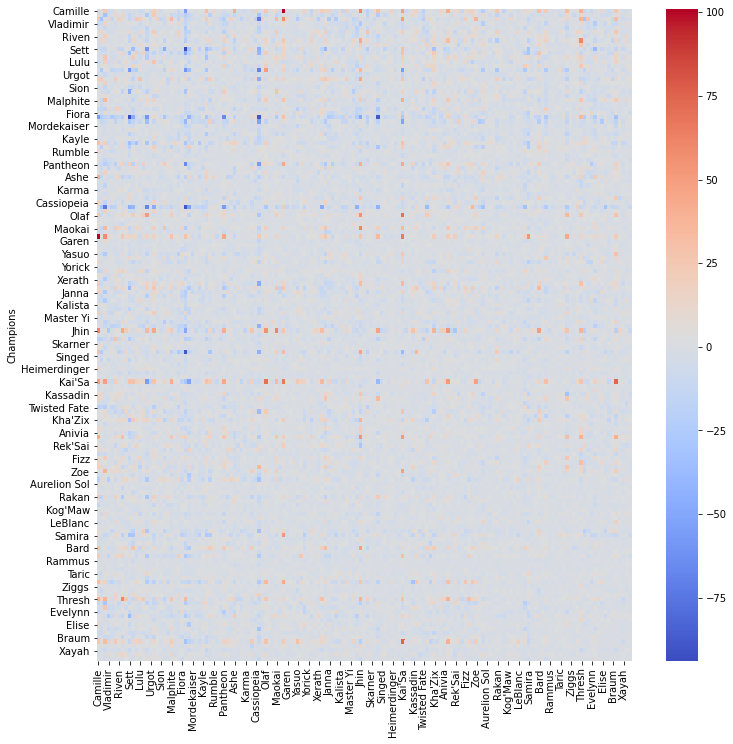

In [47]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(synergy,cmap='coolwarm')

In [41]:
synergy.to_csv('Synergyscores.csv',index=False)

In [42]:
df.to_csv('LOLOracleDatawithSynscores.csv',index=False)